In [2]:
#Divide data set in train and validation
train, other = train_test_split(data, test_size=0.2, random_state=0)
validation, test = train_test_split(other, test_size=0.5, random_state=0)

print('The sizes for train, test, and validation is {}'.format((len(train), len(test), len(validation))))
data.head()


x_train = train.drop(columns=['GCSEgrade'])
y_train = train['GCSEgrade']

x_val = validation.drop(columns=['GCSEgrade'])
y_val = validation['GCSEgrade']

x_test = test.drop(columns=['GCSEgrade'])
y_test = test['GCSEgrade']


The sizes for train, test, and validation is (268, 34, 34)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv('LondonGCSEData1.csv') # import csv data here

#Binarize dependent variable
meangrade = data['ATT8SCR'].mean()
sdgrade = data['ATT8SCR'].std()


data['GCSEgrade'] = np.where(data['ATT8SCR'] >= meangrade , 1, 0)

#get rid of non useful columns
data = data.drop('ATT8SCR', axis=1)
data = data.drop('URN', axis=1)
data = data.drop('SCHOOLTYPE', axis=1)
data = data.drop('P8MEA', axis=1)
data = data.dropna()

In [3]:
#Get mean and stds for train set
x_means = x_train.mean(axis=0)
x_stds = x_train.std(axis=0)

# Standardise the splits.
x_train = (x_train - x_means) / x_stds
x_val = (x_val - x_means) / x_stds
x_test = (x_test - x_means) / x_stds

In [4]:
#Number of samples with GCSEgrade equal to 1
high_grade = sum(train['GCSEgrade'] == 1)
#Total number of samples in the training set
total = len(train)

In [5]:
#Compute the Gini Impurity of decision node GCSEgrade.
p = high_grade/total

gini = 2 * p * (1 - p)

print('Gini Impurity for the decision node defined by `GCSEgrade`: {}'.format(gini))

Gini Impurity for the decision node defined by `GCSEgrade`: 0.49599019826241925


In [6]:
#Computing the decision tree.
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
data = data.dropna()

dt = tree.DecisionTreeClassifier(max_depth =8, min_impurity_decrease = 0.01)
dt = dt.fit(x_train, y_train)

In [7]:
#Compute the accuracy, precision, and recall for the validation set with the trained decision tree.
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('\nFor the validation set:')
print('Accuracy: \t{}'.format(accuracy_score(y_val, dt.predict(x_val))))
print('Precision: \t{}'.format(precision_score(y_val, dt.predict(x_val))))
print('Recall: \t{}'.format(recall_score(y_val, dt.predict(x_val))))



For the validation set:
Accuracy: 	0.7941176470588235
Precision: 	0.8571428571428571
Recall: 	0.7058823529411765


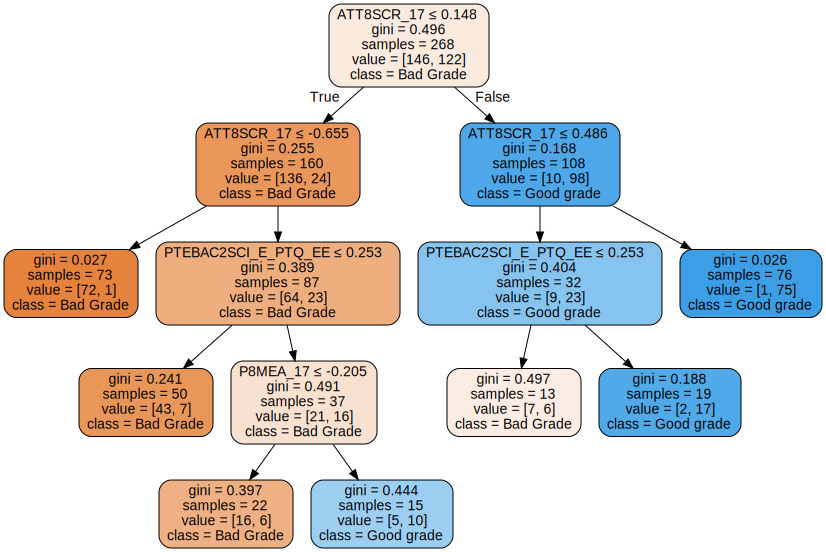

In [8]:
import sklearn.tree as tree
import graphviz
dot_data = tree.export_graphviz(dt, out_file=None) 
graph = graphviz.Source(dot_data) 

predictors = x_train.columns
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names = predictors,
                                class_names = ('Bad Grade', 'Good grade'),
                                
                                filled = True, rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)  
graph 

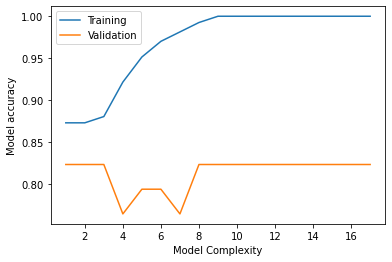

The maximum depth for the decision tree is: 3


In [9]:
#Determining the appropiate maximum depth for the decision tree

max_depth = range(1,18)
t_score = []
v_score = []
d_out = 0

for d in max_depth:
    dt = tree.DecisionTreeClassifier(random_state=1, max_depth=d)
    dt.fit(np.asarray(x_train), y_train)
    v_score.append(accuracy_score(y_val, dt.predict(np.asarray(x_val))))
    t_score.append(accuracy_score(y_train, dt.predict(np.asarray(x_train))))
    if (d_out == 0) & (d>2):
        if (t_score[-1]/t_score[-2] < 1.001) | (np.mean(v_score[-3:]) < np.mean(v_score[-4:-1])):
            d_out = d-1
    
plt.plot(max_depth, t_score, label='Training')
plt.plot(max_depth, v_score, label='Validation')
plt.legend()
plt.xlabel('Model Complexity')
plt.ylabel('Model accuracy')
plt.show()
print('The maximum depth for the decision tree is: {}'.format(d_out))

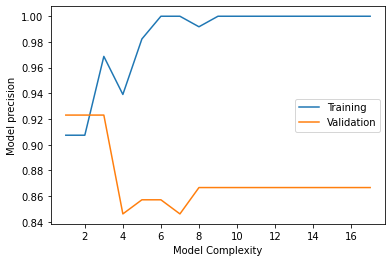

The maximum depth for the decision tree is: 2


In [10]:
max_depth = range(1,18)
t_score = []
v_score = []
d_out = 0

for d in max_depth:
    dt = tree.DecisionTreeClassifier(random_state=1, max_depth=d)
    dt.fit(np.asarray(x_train), y_train)
    v_score.append(precision_score(y_val, dt.predict(np.asarray(x_val))))
    t_score.append(precision_score(y_train, dt.predict(np.asarray(x_train))))
    if (d_out == 0) & (d>2):
        if (t_score[-1]/t_score[-2] < 1.001) | (np.mean(v_score[-3:]) < np.mean(v_score[-4:-1])):
            d_out = d-1
    
plt.plot(max_depth, t_score, label='Training')
plt.plot(max_depth, v_score, label='Validation')
plt.legend()
plt.xlabel('Model Complexity')
plt.ylabel('Model precision')
plt.show()
print('The maximum depth for the decision tree is: {}'.format(d_out))

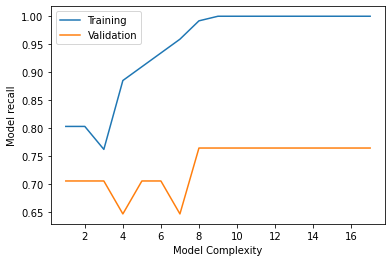

The maximum depth for the decision tree is: 2


In [11]:
#Determining the appropiate maximum depth for the decision tree

max_depth = range(1,18)
t_score = []
v_score = []
d_out = 0

for d in max_depth:
    dt = tree.DecisionTreeClassifier(random_state=1, max_depth=d)
    dt.fit(np.asarray(x_train), y_train)
    v_score.append(recall_score(y_val, dt.predict(np.asarray(x_val))))
    t_score.append(recall_score(y_train, dt.predict(np.asarray(x_train))))
    if (d_out == 0) & (d>2):
        if (t_score[-1]/t_score[-2] < 1.001) | (np.mean(v_score[-3:]) < np.mean(v_score[-4:-1])):
            d_out = d-1
    
plt.plot(max_depth, t_score, label='Training')
plt.plot(max_depth, v_score, label='Validation')
plt.legend()
plt.xlabel('Model Complexity')
plt.ylabel('Model recall')
plt.show()
print('The maximum depth for the decision tree is: {}'.format(d_out))

Accuracy:0.8235294117647058
Precision:0.9230769230769231
Recall:0.7058823529411765



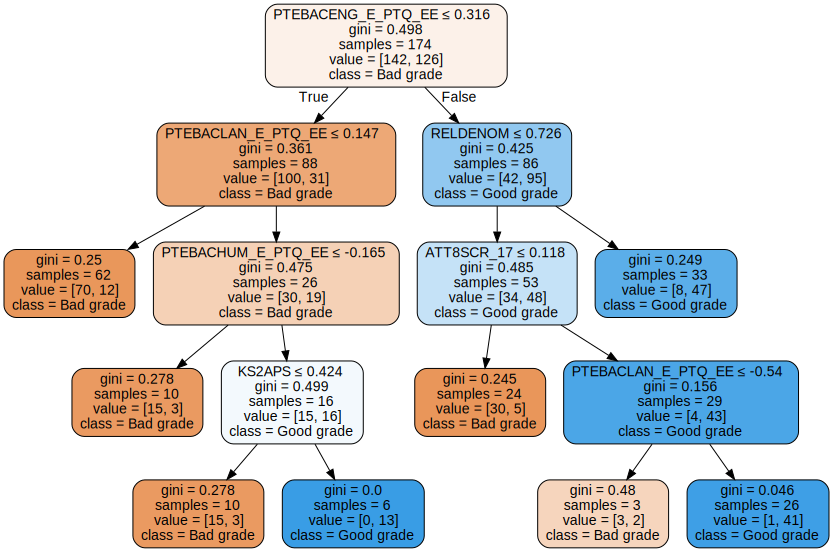

In [12]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 8, min_impurity_decrease = 0.01)
model = model.fit(x_train, y_train)
ypred = model.predict(x_val)
acc = accuracy_score(y_val, ypred)
prec = precision_score (y_val, ypred)
rec = recall_score(y_val, ypred)
print('Accuracy:{}'.format(acc))
print('Precision:{}'.format(prec))
print('Recall:{}'.format(rec))

print("")

estimator = model.estimators_[5]
dot_data = tree.export_graphviz(estimator, out_file=None)
graph = graphviz.Source(dot_data)
predictors = x_train.columns
dot_data = tree.export_graphviz(estimator, out_file=None,
                               feature_names = predictors,
                               class_names = ('Bad grade', 'Good grade'),
                               filled = True, rounded = True,
                               special_characters = True)
graph = graphviz.Source(dot_data)
graph